## Implementation Questions

#### Question 1

{'Artificial': 0, 'can': 1, 'in': 2, 'several': 3, 'and': 4, 'humans': 5, 'jobs': 6, 'applications': 7, 'Intelligence': 8, 'replace': 9}
[(['Artificial', 'Intelligence', 'replace', 'humans'], 'can'), (['Intelligence', 'can', 'humans', 'in'], 'replace'), (['can', 'replace', 'in', 'several'], 'humans'), (['replace', 'humans', 'several', 'jobs'], 'in'), (['humans', 'in', 'jobs', 'and'], 'several'), (['in', 'several', 'and', 'applications'], 'jobs')]


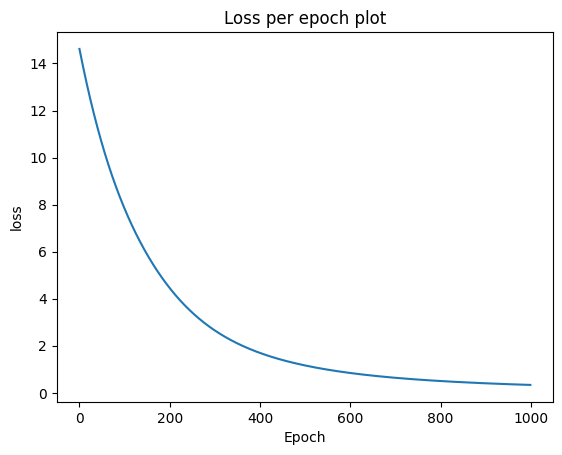

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


CONTEXT_SIZE = 4
EMBEDDING_DIM = 3

test_sentence = '''Artificial Intelligence can replace humans in several jobs and applications'''.split()
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}
print(word_to_ix)
ngrams = [([test_sentence[i], test_sentence[i + 1], test_sentence[i + 3], test_sentence[i + 4]], test_sentence[i + 2]) for i in range(len(test_sentence) - CONTEXT_SIZE)]
print(ngrams)

class CBOWModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOWModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = CBOWModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    total_loss = 0
    for context, target in ngrams:
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Loss per epoch plot')
plt.show()

#### Question 2

(a) Using the spacy library, extract and print named entities from the given
text

In [ ]:
import spacy

text = '''
Who are you talking to right now? Who is it you think you see? Do you know
how much I make a year? I mean, even if I told you, you wouldn’t believe
it. Do you know what would happen if I suddenly decided to stop going into
work? A business big enough that it could be listed on the NASDAQ goes belly
up. Disappears! It ceases to exist without me. No, you clearly don’t know who
you’re talking to, so let me clue you in. I am not in danger, Skyler. I am the
danger. A guy opens his door and gets shot and you think that of me? No. I
am the one who knocks!
'''

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

a year 92 98 DATE
NASDAQ 283 289 ORG
Skyler 441 447 PERSON


(b) 

{'of': 0, 'decided': 1, 'A': 2, 'clearly': 3, 'now?': 4, 'me.': 5, 'danger,': 6, 'clue': 7, 'exist': 8, 'right': 9, 'mean,': 10, 'opens': 11, 'let': 12, 'be': 13, 'is': 14, 'on': 15, 'would': 16, 'you’re': 17, 'who': 18, 'going': 19, 'to': 20, 'goes': 21, 'you': 22, 'the': 23, 'so': 24, 'knocks!': 25, 'and': 26, 'in': 27, 'could': 28, 'what': 29, 'me': 30, 'talking': 31, 'It': 32, 'even': 33, 'that': 34, 'think': 35, 'danger.': 36, 'am': 37, 'stop': 38, 'No.': 39, 'NASDAQ': 40, 'wouldn’t': 41, 'if': 42, 'ceases': 43, 'listed': 44, 'not': 45, 'work?': 46, 'believe': 47, 'see?': 48, 'shot': 49, 'how': 50, 'don’t': 51, 'much': 52, 'you,': 53, 'business': 54, 'told': 55, 'up.': 56, 'a': 57, 'know': 58, 'to,': 59, 'Skyler.': 60, 'guy': 61, 'one': 62, 'are': 63, 'me?': 64, 'I': 65, 'door': 66, 'gets': 67, 'year?': 68, 'suddenly': 69, 'it': 70, 'into': 71, 'big': 72, 'No,': 73, 'enough': 74, 'his': 75, 'happen': 76, 'make': 77, 'belly': 78, 'Disappears!': 79, 'without': 80, 'in.': 81, 'Who': 

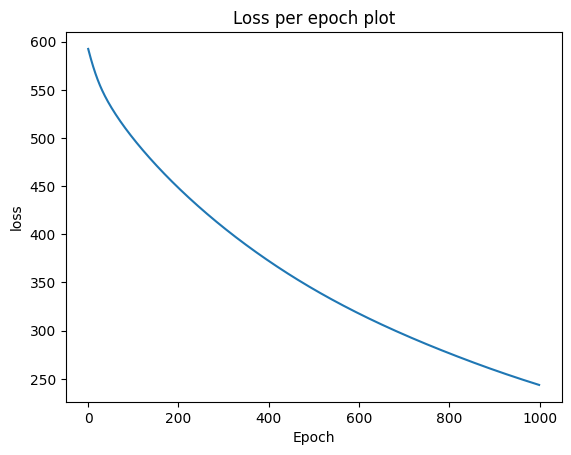

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


CONTEXT_SIZE = 2
EMBEDDING_DIM = 3

test_sentence = text = '''
Who are you talking to right now? Who is it you think you see? Do you know
how much I make a year? I mean, even if I told you, you wouldn’t believe
it. Do you know what would happen if I suddenly decided to stop going into
work? A business big enough that it could be listed on the NASDAQ goes belly
up. Disappears! It ceases to exist without me. No, you clearly don’t know who
you’re talking to, so let me clue you in. I am not in danger, Skyler. I am the
danger. A guy opens his door and gets shot and you think that of me? No. I
am the one who knocks!
'''.split()
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}
print(word_to_ix)
ngrams = []
for i in range(len(test_sentence) - CONTEXT_SIZE):
    tup = [test_sentence[j] for j in np.arange(i + 1 , i + CONTEXT_SIZE + 1) ]
    ngrams.append((test_sentence[i],tup))
print(ngrams)

class SkipgramModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(SkipgramModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.linear2 = nn.Linear(128, context_size * vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))  
        out1 = F.relu(self.linear1(embeds))
        out2 = self.linear2(out1)
        log_probs = F.log_softmax(out2, dim=1).view(CONTEXT_SIZE,-1)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = SkipgramModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    total_loss = 0
    for context, target in ngrams:
        context_idxs = torch.tensor([word_to_ix[context]], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        target_list = torch.tensor([word_to_ix[w] for w in target], dtype=torch.long)
        loss = loss_function(log_probs, target_list)
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Loss per epoch plot')
plt.show()

#### Bonus Question

###### Text pre-processing

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the data from CSV files
model_path = F"/content/drive/My Drive/comp6721-assignment/comp6721_a4_bonus.pth"
fake_df = pd.read_csv('/content/drive/My Drive/comp6721-assignment/Fake.csv')
real_df = pd.read_csv('/content/drive/My Drive/comp6721-assignment/True.csv')

# Add a label column to the dataframes
fake_df['label'] = 0
real_df['label'] = 1

# Concatenate the dataframes and shuffle the rows
df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train, validation, and test sets, 70-10-20
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.125, stratify=train_df['label'], random_state=42)

# Tokenize and preprocess the input sentences
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if not word in stop_words]
    return ' '.join(words)

train_df['text'] = train_df['text'].apply(preprocess)
val_df['text'] = val_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)

# Define a function to tokenize and pad the input sentences
def tokenize_and_pad(text, word_to_idx, max_len):
    tokens = text.split()
    token_ids = [word_to_idx.get(token, 0) for token in tokens]
    pad_len = max_len - len(token_ids)
    if pad_len > 0:
        token_ids = token_ids + [0] * pad_len
    else:
        token_ids = token_ids[:max_len]
    return token_ids

# Define a custom dataset class for the news articles
class NewsDataset(Dataset):
    def __init__(self, df, word_to_idx, max_len):
        self.texts = df['text']
        self.labels = df['label']
        self.word_to_idx = word_to_idx
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        token_ids = tokenize_and_pad(text, self.word_to_idx, self.max_len)
        return np.array(token_ids), label


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###### CNN model and training

Epoch [1/10], Train Loss: 0.0342, Train Acc: 0.9896, Val Loss: 0.0129, Val Acc: 0.9973
Epoch [2/10], Train Loss: 0.0027, Train Acc: 0.9993, Val Loss: 0.0136, Val Acc: 0.9976
Epoch [3/10], Train Loss: 0.0006, Train Acc: 0.9999, Val Loss: 0.0164, Val Acc: 0.9973
Epoch [4/10], Train Loss: 0.0005, Train Acc: 0.9999, Val Loss: 0.0176, Val Acc: 0.9976
Epoch [5/10], Train Loss: 0.0004, Train Acc: 1.0000, Val Loss: 0.0202, Val Acc: 0.9976
Epoch [6/10], Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0214, Val Acc: 0.9976
Epoch [7/10], Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0226, Val Acc: 0.9976
Epoch [8/10], Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0237, Val Acc: 0.9976
Epoch [9/10], Train Loss: 0.0004, Train Acc: 1.0000, Val Loss: 0.0238, Val Acc: 0.9976
Epoch [10/10], Train Loss: 0.0002, Train Acc: 1.0000, Val Loss: 0.0257, Val Acc: 0.9976


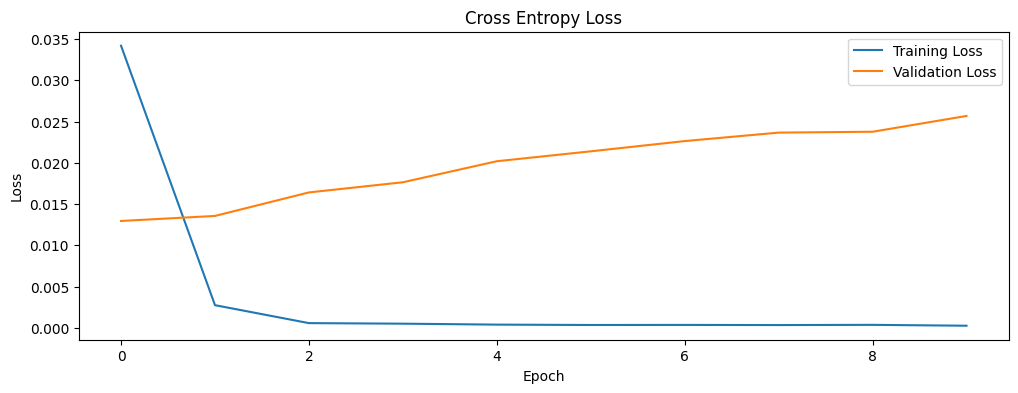

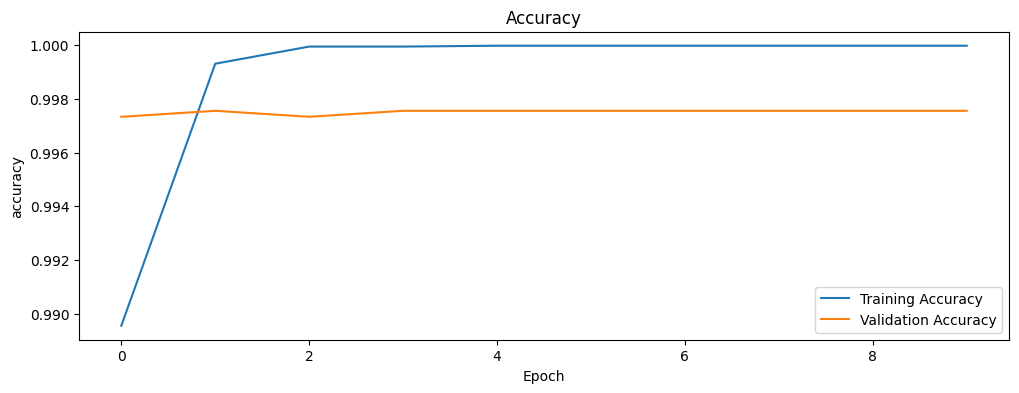

Train accuracy: 100.00
Test accuracy: 99.82
Confusion Matrix:
[[4687    9]
 [   7 4277]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



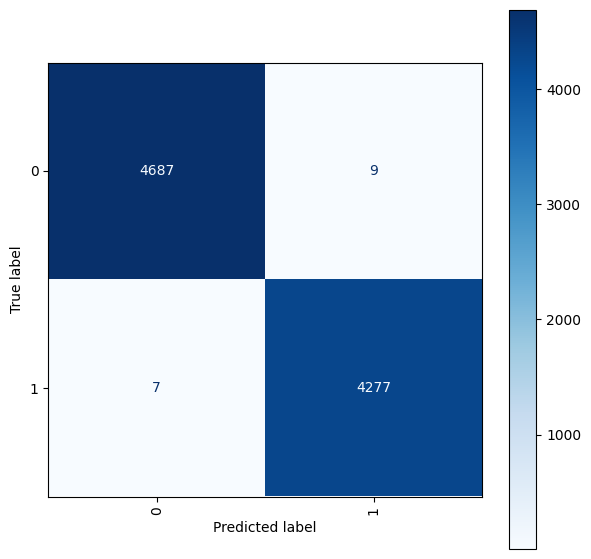

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Define a simple CNN model for text classification
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, num_classes, max_len):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.conv1 = nn.Conv1d(embedding_size, hidden_size, kernel_size=3)
        self.pool1 = nn.MaxPool1d(kernel_size=max_len-2)
        self.fc1 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        x = nn.functional.relu(self.conv1(x))
        x = self.pool1(x)
        x = x.squeeze(-1)
        x = self.fc1(x)
        return x


# Create a list of all the words in the training data
words = []
for text in train_df['text']:
    words += text.split()

# Count the frequency of each word
word_counts = pd.Series(words).value_counts()

# Get the number of unique words in the training data
vocab_size = len(word_counts)
word_to_idx = {word: i + 1 for i, word in enumerate(train_df['text'].str.split(expand=True).unstack().value_counts().index[:vocab_size])}
embedding_size = 128
hidden_size = 256
num_classes = 2
max_len = 50
batch_size = 32
lr = 1e-3
num_epochs = 10

train_dataset = NewsDataset(train_df, word_to_idx, max_len)
val_dataset = NewsDataset(val_df, word_to_idx, max_len)
test_dataset = NewsDataset(test_df, word_to_idx, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN(vocab_size, embedding_size, hidden_size, num_classes, max_len)
# Move the model to the device (GPU or CPU)
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move the inputs and targets to the device
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs.long())
        loss = criterion(outputs, targets.long())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_acc += (predicted == targets).sum().item()

    train_loss /= len(train_loader)
    train_acc /= len(train_loader.dataset)

    # Evaluate the model on the validation set
    val_loss = 0.0
    val_acc = 0.0
    model.eval()

    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(val_loader):
            # Move the inputs and targets to the device
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs.long())
            loss = criterion(outputs, targets.long())

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_acc += (predicted == targets).sum().item()

        val_loss /= len(val_loader)
        val_acc /= len(val_loader.dataset)

    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)
    val_acc_list.append(val_acc)
    val_loss_list.append(val_loss)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(train_acc_list, label="Training Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Save model
torch.save(model.state_dict(), model_path)

# Evaluation
def evaluate_model(title, model, dataloader, device):
    model.eval()  # for batch normalization layers
    corrects = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs.long())
            _, preds = torch.max(outputs, 1)
            corrects += (preds == targets.data).sum()
            y_true.extend(targets.tolist())
            y_pred.extend(preds.tolist())

    print('{title} accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset), title=title))
    if title.lower() == "test":
        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Compute the precision, recall, and F1 score
        report = classification_report(y_true, y_pred)
        print('Confusion Matrix:')
        print(cm)
        print('Classification Report:')
        print(report)
        fig, ax = plt.subplots(figsize=(7, 7))
        ConfusionMatrixDisplay(cm).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
        plt.show()  


evaluate_model("Train", model, train_loader, device)
evaluate_model("Test", model, test_loader, device)
